# AUTOENCODERS

As you already know, an autoencoder is a very useful model for solving problems like denoising images.

In this easy execise we will learn how to apply them for this purpose using mnist dataset which is included in keras by default and contains different images of numbers from 0 to 9.

First thing we have to do is importing libraries we are going to use. In this case, keras (with different layers like Dense, Dropout and Flatten and also convolutional layers) will help us for creating the model: 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Next step is importing the dataset mnist. mnist comes already splitted in train and test.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### ADDING NOISE TO THE TRAINING DATASET

Now is time to create a noise images dataset. As you can know, noise used to follow a normal distribution, so we are using the random number generator of numpy for creating that noise and adding it to our training set. 

In [3]:
ruido = np.random.normal(2, 40,x_train.shape)
x_train_ruido = x_train + ruido

We can also visualize the same number noised and denoised just to see the difference between each other:

Text(0.5, 1.0, 'Imagen sin ruido')

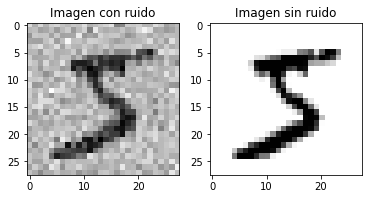

In [4]:
plt.subplot(1,2,1)
plt.imshow(x_train_ruido[0], cmap=plt.cm.binary)
plt.title("Imagen con ruido")
plt.subplot(1,2,2)
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title("Imagen sin ruido")

The idea is the autoencoder must learn how to remove the noise of the noised image in order to generate the right image

### ADDING NOISE TO THE TEST DATASET

In the same way, we are adding noise to the test set:

In [5]:
ruido = np.random.normal(2, 40,x_test.shape)
x_test_ruido = x_test + ruido

Next step is reshaping data and normalizing it in order to adapt it to a neural network:

In [6]:
train_data_ruido = x_train_ruido.reshape(-1, 28,28, 1)
train_data = x_train.reshape(-1, 28,28, 1)

test_data_ruido = x_test_ruido.reshape(-1, 28,28, 1)
test_data = x_test.reshape(-1, 28,28, 1)

In [7]:
max_train_ruido = np.max(train_data_ruido)
max_train = np.max(train_data)

max_test_ruido = np.max(test_data_ruido)
max_test = np.max(test_data)

In [8]:
train_data_ruido = train_data_ruido / max_train_ruido
train_data = train_data / max_train

test_data = test_data / max_test
test_data_ruido = test_data_ruido / max_test_ruido

In [9]:
np.max(train_data),np.max(train_data_ruido),np.max(test_data_ruido), np.max(test_data)

(1.0, 1.0, 1.0, 1.0)

### MODEL CREATION

For creating the autoencoder model we first need to reshample data for converting it as an input neurla network array 

In [10]:
train_data = np.array(train_data)
train_data = train_data.reshape(60000,784)

train_data_ruido = np.array(train_data_ruido)
train_data_ruido = train_data_ruido.reshape(60000,784)

Now we define the model. In keras is easy to do it. Remember, an autoencoder is a mirrored strcture. That means encoder must have same structrure as decoder.

First thing is importing the secuential model class:

In [11]:
model = Sequential()

Then we will start by adding our first layer, which will be a dense one where all neurones (784, 28x28 pixels) will have relu activation function

In [12]:
model.add(Dense(784,activation='relu',input_dim=784))

Then we will add two more dense layers:

In [13]:
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

With it, we will have the encoder. Now is time to replicate it for the decoder.

In [14]:
model.add(Dense(256,activation='relu'))
model.add(Dense(784,activation='relu'))

As a curiosity, relu should be the most common activation function in DL models. That is because it helps to train the model quicker (thanks to and easy derivative aproximation)

Let's go a step forward and define the loss function, the optimizer for the backpropagation weight update and the accuracy metric

In [15]:
model.compile(loss=keras.losses.mean_squared_error,
             optimizer=keras.optimizers.Adam(),metrics = ['accuracy'])

Next step is training the model. In this case we will train the model for 10 epochs with a batch size of 256 samples. Remember, the input data will be the noised images and the output will be the denoised ones

In [16]:
model.fit(train_data_ruido,train_data,epochs=10,batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.0294 - accuracy: 0.0103
Epoch 2/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0139 - accuracy: 0.0123
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0120 - accuracy: 0.0132
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0110 - accuracy: 0.0136
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0104 - accuracy: 0.0149
Epoch 6/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0100 - accuracy: 0.0147
Epoch 7/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0097 - accuracy: 0.0155s - loss: 0.0
Epoch 8/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0095 - accuracy: 0.0153
Epoch 9/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0093 - accuracy: 0.0163
Epoch 10/10
60000/60000 [==

Once the model is trained, is time to pass through the model our test data. We can get it by using predict method

In [17]:
test_data = np.array(test_data)
test_data = test_data.reshape(10000,784)

test_data_ruido = np.array(test_data_ruido)
test_data_ruido = test_data_ruido.reshape(10000,784)

In [18]:
x_decoded = model.predict(test_data_ruido)

### SHOWING PREDICTION RESULTS

For visualizing the results we go backwards all the process for reconstructing the images as a 28x28 pixels:

In [19]:
imagen_sin_ruido = x_decoded[0].reshape(28,28) * max_test
imagen_con_ruido = test_data_ruido[0].reshape(28,28) * max_test_ruido

And finally, we can see the results:

Text(0.5, 1.0, 'Denoised image')

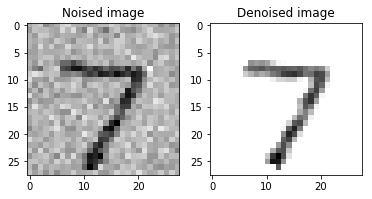

In [20]:
plt.subplot(1,2,1)
plt.imshow(imagen_con_ruido, cmap=plt.cm.binary)
plt.title("Noised image")
plt.subplot(1,2,2)
plt.imshow(imagen_sin_ruido, cmap=plt.cm.binary)
plt.title("Denoised image")

As you can see, the left image (the input one) is a fully noised image and, the output image has being reconstructed as a denoised image

This was not by chance. We can see another example:

Text(0.5, 1.0, 'Denoised image')

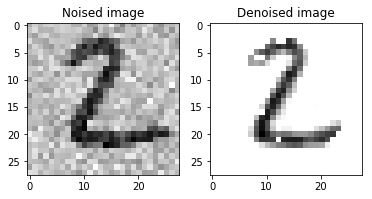

In [21]:
imagen_sin_ruido = x_decoded[1].reshape(28,28) * max_test
imagen_con_ruido = test_data_ruido[1].reshape(28,28) * max_test_ruido

plt.subplot(1,2,1)
plt.imshow(imagen_con_ruido, cmap=plt.cm.binary)
plt.title("Noised image")
plt.subplot(1,2,2)
plt.imshow(imagen_sin_ruido, cmap=plt.cm.binary)
plt.title("Denoised image")